#### face_recognition 설치

- Visual Studio 2015 설치.(여러 문제로 2015 버젼을 설치함.)
    - Visual C++ 옵션을 체크하고 설치할 것.
- pip install cmake
- pip install dlib
- pip install face-recognition

In [1]:
import face_recognition, cv2, pickle
from IPython.display import Image

In [2]:
# 학습 데이터가 있는 폴더 리스트.(손흥민 이미지와 테디 이미지 각 10개씩 준비.)
paths = ['opencv_data/dataset/son/', 'opencv_data/dataset/tedy/']

# 결과 데이터.
names = ['Son', 'Tedy']

# 이미지의 개수.(폴더당 이미지의 수)
img_num = 10

# 확장자.
img_type = '.jpg'

# 인코딩된 데이터를 저장할 파일 이름.
encoding_file = 'encodings.pickle'

# 신경망의 종류(CNN, Hog)
# CNN : 속도가 느리지만 정확도가 높다. GPU를 사용할 수 있는 환경이라면 Hog와 속도가 비슷.
# Hog : 속도가 빠르지만 정확도가 낮다. GPU를 사용할 수 없는 환경이라면 CNN보다 20배 정도 더 빠름.
Model_method = 'cnn'

# 이미지를 인코딩한 데이터를 담을 리스트.
known_Encodings = []

# 결과 데이터를 담을 리스트.
known_Names = []

# 학습할 이미지가 들어 있는 폴더의 수 만큼 반복.
for i, path in enumerate( paths ) :
    
    # i 번째 결과 데이터.
    Name = names[i]
    # print(Name)
    
    # 폴더 내의 이미지 수 만큼 반복.
    for idx in range(img_num) :
        
        # 데이터를 가져올 파일명.
        file_name = path + str(idx + 1) + img_type
        # print(file_name)
        
        # 이미지 데이터 읽기.
        img = cv2.imread(file_name)
        
        # BGR 형태의 색상 체계를 RGB 형태로 변환.
        rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # face-recognition을 이용해 학습 사진의 얼굴 부위 데이터를 추출.
        Boxes = face_recognition.face_locations(rgb, model=Model_method)
        # print(Boxes)
        
        # 추출한 얼굴 부위와 이미지 데이터를 이용해 얼굴 데이터 인코딩.
        Encodings = face_recognition.face_encodings(rgb, Boxes)
        # print(Encodings)
        
        # 추출한 얼굴 부위 데이터를 담음.
        for en in Encodings :
            known_Encodings.append(en)
            known_Names.append(Name)

# 파일로 저장.
data = {'encodings' : known_Encodings, 'names' : known_Names}
with open(encoding_file, 'wb') as fp :
    fp.write(pickle.dumps(data))
print('저장 완료')

저장 완료


In [3]:
# 가져온 이미지를 위에서 한 방식과 똑같이 작업.
# 이미지.
image_file = 'opencv_data/image/marathon_01.jpg'

# 손흥민과 Teddy  사진 데이터가 저장된 데이터 파일.
Encoding_file = 'encoding.pickle'

# 인식하지 못한 사람에게 부여할 결과 데이터.
unknown_name = 'Unknown' 

# 학습 방식.
model_method = 'cnn'

# 사용할 이미지.
image = cv2.imread(image_file)

# 파일로 저장한 데이터 읽기.
with open(encoding_file, 'rb') as fp :
    a = fp.read()
    data = pickle.loads(a)
# print(data)

# 사용할 이미지 색상 체계 변환.
RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 사진에서 얼굴 부분만 가져옴.
boxes = face_recognition.face_locations(RGB, model=model_method)
# print(boxes)

# 가져온 얼굴 부분에 해당하는 데이터들을 추출.
encodings = face_recognition.face_encodings(RGB, boxes)

# 검출된 사람의 이름을 담을 리스트.
names = []

# 가져온 얼굴 데이터의 수 만큼 반복.
for en in encodings :
    
    # 가져온 얼굴 데이터와 손흥민 Teddy 얼굴 사진이 저장된 데이터와 비교.
    # data['encodings'] : 손흥민과 Teddy의 얼굴 데이터.
    # en : 방금 가져온 얼굴 데이터.
    match = face_recognition.compare_faces(data['encodings'], en)
    # print(match)
    name = unknown_name
    
    # 매칭된 결과에 True가 포함된다면.
    if True in match :
        # print(data['names'])
        # print(match)
        # True인 경우에만 담기.
        match_index = [ i for (i, b) in enumerate(match) if b]
        # print(match_index)
        
        # 결과를 담을 딕셔너리.
        cnt = {}
        
        # True 자리에 해당하는 인덱스가 담긴 리스트의 데이터 수 만큼 반복.
        for i in match_index :
            # print(i)
            # i 번째 이름을 추출.
            name = data['names'][i]
            #print(name)
            
            # 이름에 해당하는 값을 1 증가시킴.
            cnt[name] = cnt.get(name, 0) + 1
        # print(cnt)
        
        # 딕셔너리에 들어 있는 값들 중에 제일 큰 값의 이름을 추출.
        name = max(cnt, key=cnt.get)
        # print(name)
    
    # 추출한 이름을 담음.
    names.append(name)
    # print(names)
    
# 찾은 얼굴의 수 만큼 반복.
for ( (top, right, bottom, left), name ) in zip(boxes, names) :
    # print(top, right, bottom, left, name)            
    
    # 인식하지 못한 사람.
    if name == unknown_name :
        color = (255, 0 ,0)
        line = 2
        
    # 인식한 사람.
    else : 
        color = (0, 0, 255)
        line = 4
        
    # 얼굴 영역 표시.
    cv2.rectangle(image, (left, top), (right, bottom), color, line)

    # 이름 표시.
    cv2.putText(image, name, (left, top - 6), cv2.FONT_HERSHEY_PLAIN, 1, color, 1)
        
    
cv2.imshow('Face', image)
cv2.waitKey()
cv2.destroyAllWindows()

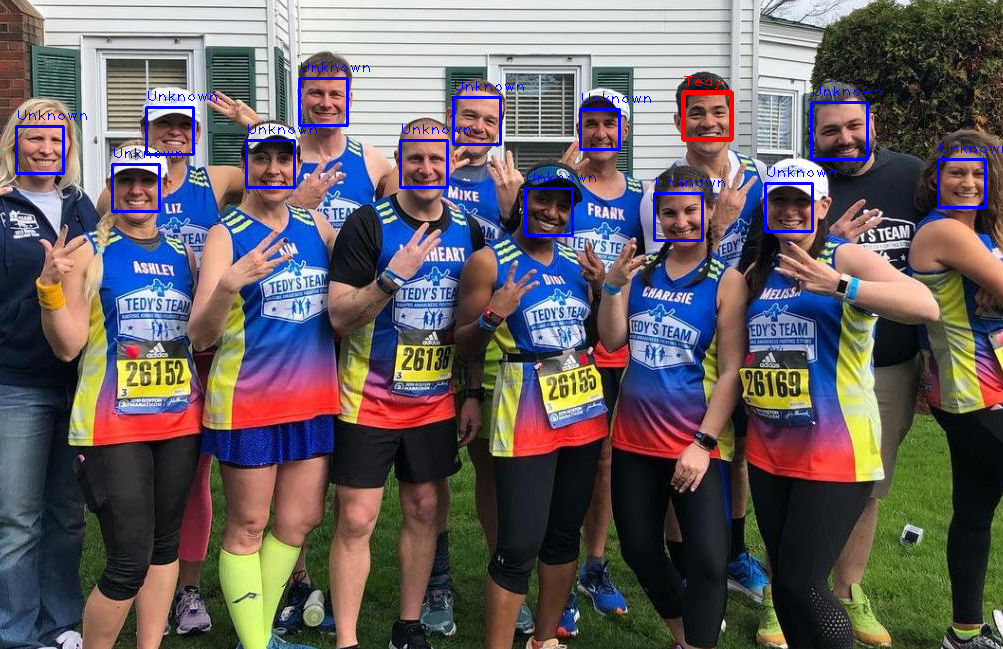

In [4]:
Image('opencv_image/22.1.PNG')

In [5]:
# 간단히 함수로 만들어서 이용.
def detectAndDisplay(image) :
    # 사용할 이미지 색상 체계 변환.
    RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 사진에서 얼굴 부분만 가져옴.
    boxes = face_recognition.face_locations(RGB, model=model_method)
    # print(boxes)

    # 가져온 얼굴 부분에 해당하는 데이터들을 추출.
    encodings = face_recognition.face_encodings(RGB, boxes)

    # 검출된 사람의 이름을 담을 리스트.
    names = []

    # 가져온 얼굴 데이터의 수 만큼 반복.
    for en in encodings :

        # 가져온 얼굴 데이터와 손흥민 Teddy 얼굴 사진이 저장된 데이터와 비교.
        # data['encodings'] : 손흥민과 Teddy의 얼굴 데이터.
        # en : 방금 가져온 얼굴 데이터.
        match = face_recognition.compare_faces(data['encodings'], en)
        # print(match)
        name = unknown_name

        # 매칭된 결과에 True가 포함된다면.
        if True in match :
            # print(data['names'])
            # print(match)
            # True인 경우에만 담기.
            match_index = [ i for (i, b) in enumerate(match) if b]
            # print(match_index)

            # 결과를 담을 딕셔너리.
            cnt = {}

            # True 자리에 해당하는 인덱스가 담긴 리스트의 데이터 수 만큼 반복.
            for i in match_index :
                # print(i)
                # i 번째 이름을 추출.
                name = data['names'][i]
                #print(name)

                # 이름에 해당하는 값을 1 증가시킴.
                cnt[name] = cnt.get(name, 0) + 1
            # print(cnt)

            # 딕셔너리에 들어 있는 값들 중에 제일 큰 값의 이름을 추출.
            name = max(cnt, key=cnt.get)
            # print(name)

        # 추출한 이름을 담음.
        names.append(name)
        # print(names)

    # 찾은 얼굴의 수 만큼 반복.
    for ( (top, right, bottom, left), name ) in zip(boxes, names) :
        # print(top, right, bottom, left, name)            

        # 인식하지 못한 사람.
        if name == unknown_name :
            color = (255, 0 ,0)
            line = 2

        # 인식한 사람.
        else : 
            color = (0, 0, 255)
            line = 4

        # 얼굴 영역 표시.
        cv2.rectangle(image, (left, top), (right, bottom), color, line)

        # 이름 표시.
        cv2.putText(image, name, (left, top - 6 ), cv2.FONT_HERSHEY_PLAIN, 1, color, 1)

In [6]:
# 영상.
vedio_file = 'opencv_data/video/tedy_01.mp4'

# 영상 읽기.
cap = cv2.VideoCapture(vedio_file)

while True :
    ret, image = cap.read()
    if image is None :
        break
        
    # 인식.
    detectAndDisplay(image)
    
    cv2.imshow('Face', image)
    
    if cv2.waitKey(1) & 0xFF == ord('q') :
        break
        
cv2.destroyAllWindows()

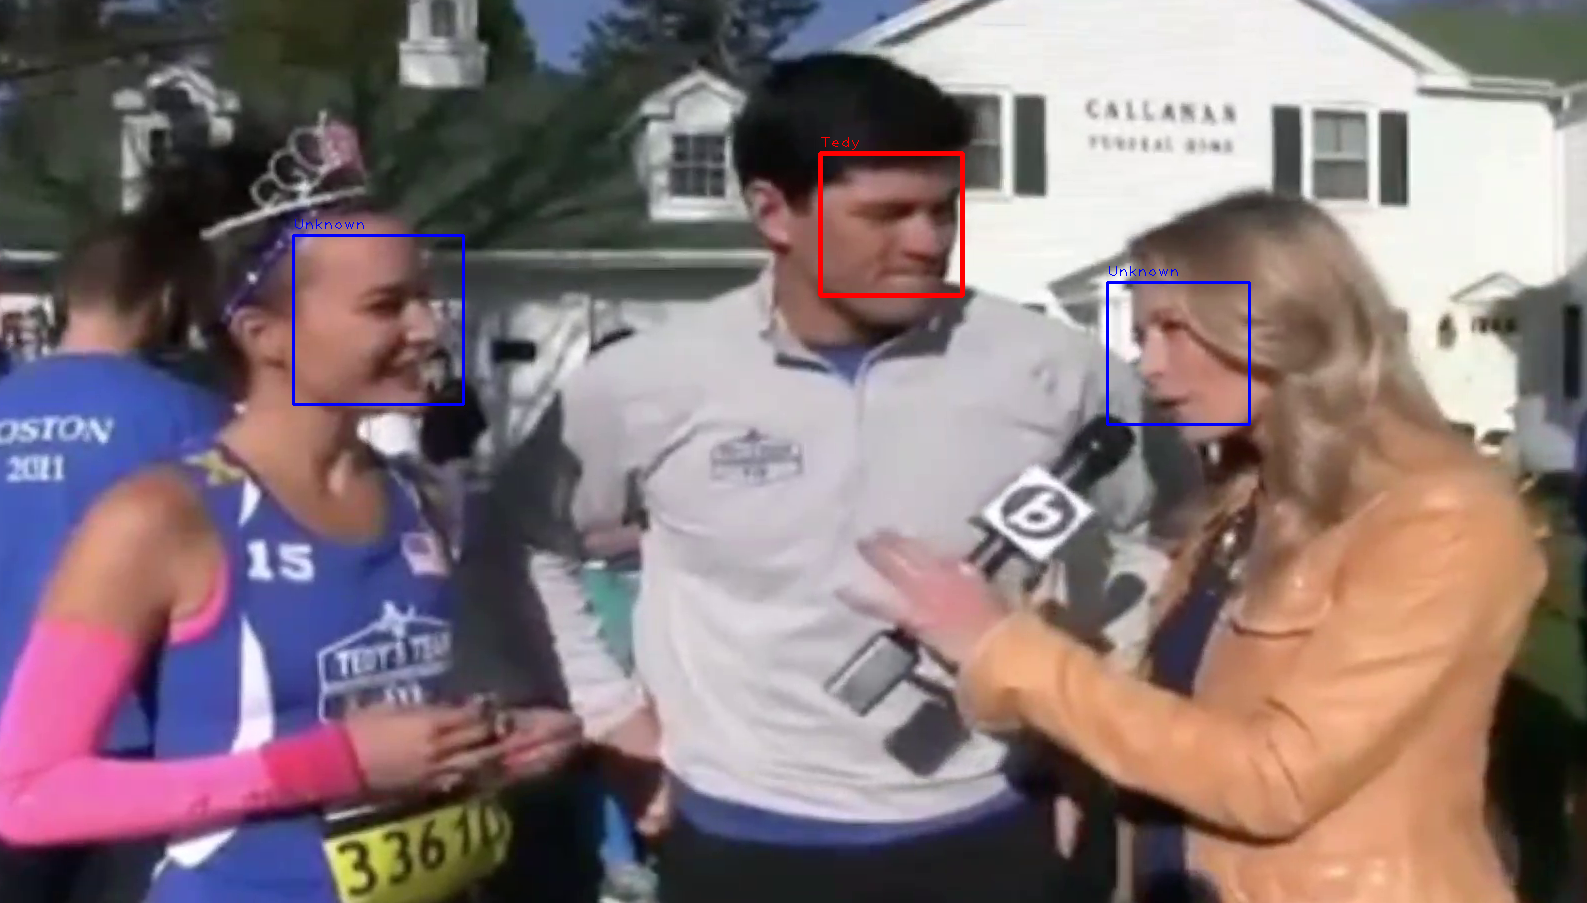

In [7]:
Image('opencv_image/22.2.PNG')